In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tabulate
!pip install seaborn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 55.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 73.5 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 49.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 31.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 39.8 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=2fcb74c4c14a3dd555acdcbaca74306fcba1c34f3db715c6200d1177354d3d4d
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 78.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn import tree
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

0

In [3]:
 hpg_reserve = pd.read_csv('hpg_reserve.csv.zip',compression='zip')

In [4]:
def Assining_Variables():
    fle1 = "air_visit_data.csv"
    fle2 = "air_reserve.csv"
    fle3 = "air_store_info.csv"
    fle4 = "date_info.csv"
    fle5 = "store_id_relation.csv"
    fle6 = hpg_reserve
    fle7 = "hpg_store_info.csv"
    fnl_flle = "bk.csv"
    start_dt = date(2022, 4, 23)
    end_dt = date(2712,7, 22)
    llll= []
    return fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle

In [5]:
def load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7):
    df_air_visit_data = pd.read_csv(fle1)
    df_air_reserve = pd.read_csv(fle2)
    df_air_store_info = pd.read_csv(fle3)
    df_date_info = pd.read_csv(fle4)
    df_store_id_relation = pd.read_csv(fle5)
    df_hpg_reserve = fle6
    df_hpg_store_info = pd.read_csv(fle7)   
    return df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info

In [6]:
 def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [7]:
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff.air_store_id.isnull().sum()
        df_hpg_store = dff.hpg_store_id.isnull().sum()
        print("Count of NAN values on air_store_id are: {0}".format(df_air_store))
        print("Count of NAN values on hpg_store_id are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff.air_store_id.isnull() & dff.hpg_store_id.isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (both air_store_id & hpg_store_id) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        
        """"dff['calendar_date'] = dff['calendar_date'].replace(np.nan, -1)
        dff['day_of_week'] = dff['day_of_week'].replace(np.nan, -1)
        dff['holiday_flg'] = dff['holiday_flg'].replace(np.nan, -1)
        dff['hpg_store_id'] = dff['hpg_store_id'].replace(np.nan, -1)
        #dff.drop(['calendar_date','day_of_week','holiday_flg','hpg_store_id'],axis=1,inplace=True)
        le = LabelEncoder()
        dff[['genre_name', 'area_name']] = dff[['genre_name', 'area_name']].apply(le.fit_transform)"""
        
        #Replacing NAN values of air_store_id,visit_datetime,reserve_datetime,visitors,reserve_visitors, with appropriate constant values
        """"dff[['visit_datetime','reserve_datetime']] = dff[['visit_datetime','reserve_datetime']].replace(np.nan,'9999 00:00:00.000')
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].replace(np.nan,0.0)
        dff['visit_date'] = dff['visit_date'].replace(np.nan,9999)
        dff[['visitors','reserve_visitors']] = dff[['visitors','reserve_visitors']].astype(int)
        dff[['air_store_id']] = dff[['air_store_id']].replace(np.nan,'air_ba937bf13d40fc25')
        #dff[['visit_datetime','reserve_datetime']] = pd.to_datetime(dff[['visit_datetime','reserve_datetime','visit_date']].astype(str),format='%Y-%m-%d')
        df_nadn = Counting_NAN_Values(dff)"""
        #dff.drop(['genre_name','area_name'],axis=1)
        #print(dff)
        return dfff,df_nadn

In [8]:
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [9]:
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
   
    # Define the ratio of gap of each fragment in a tuple
    #explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05)
    # DataFrame of each student and the votes they get df_nan_disp['Data Name'],df_nan_disp['NAN Count for each Column']
    #dft = pd.DataFrame({'Data Name': dfg.columns,'NAN Count for each Column':dft_val1})
    # Plotting the pie chart for above dataframe
    # Data to plot
    #labels = dfg.columns.values
    #sddd = dft_val1.values
    #sizes = [215, 130,215, 130,215, 130,215, 130,215, 130,215, 130,215, 130]
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #explode = (0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0,0.1, 0)  # explode 1st slice
    # Plot
    #plt.pie(sddd, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
    #plt.axis('equal')
    #plt.show()

In [10]:
def Final_Dataset():
        fle1,fle2,fle3,fle4,fle5,fle6,fle7,fnl_flle = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = load_dataset(fle1,fle2,fle3,fle4,fle5,fle6,fle7)
        #df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = self.load_dataset()
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        h4,t4 = os.path.split(fle4)
        h5,t5 = os.path.split(fle5)
        #h6,t6 = os.path.split(fle6)
        h7,t7 = os.path.split(fle7)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t4,df_date_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t5,df_store_id_relation.shape),end="\n")
        print("The shape of hpg_rserve file is {0}".format(df_hpg_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t7,df_hpg_store_info.shape),end="\n")
        
        df_n = pd.concat([df_air_visit_data,df_air_reserve], axis=0, join="outer")
        df_nn = pd.merge(df_n,df_air_store_info,on='air_store_id',how="left")
        #df_nn = df_nn.rename(columns = {'air_genre_name':'genre_name','air_area_name':'area_name'})
        hpg_n = pd.merge(df_hpg_store_info,df_hpg_reserve,on='hpg_store_id',how="left")
        #hpg_n = pd.concat([df_hpg_store_info,df_hpg_reserve,], axis=0, join="outer")
        #hpg_n = hpg_n.rename(columns = {'hpg_genre_name':'genre_name','hpg_area_name':'area_name'})
        hpg_nn = pd.merge(hpg_n,df_store_id_relation,on='hpg_store_id',how="left")
        hpg_date = pd.concat([hpg_nn,df_date_info,], axis=0, join="outer")
        df = pd.concat([df_nn,hpg_date], axis=0, join="outer")
        #hpg_date = [hpg_nn,df_date_info]
        #df_date = pd.concat(hpg_date,axis=1)
        #df_nnnn = [df_nn,df_date]
        #df = pd.concat(df_nnnn,axis=0)
        print(df)
        total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
        #Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
        df_nan_disp = pd.DataFrame()
        Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
        
        #Printing the number of NANs in each column
        n_rows = len(df)
        for i in range(0,len(df_najn)):
            nan_percent_in_each_col = ((df_najn/n_rows)*100)
            df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
        print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))
        #print(df)
        #print(df)
        
        #df = df.dropna(subset=['visitors'],inplace=True)
        #print(df)
       # from sklearn.impute import SimpleImputer
        #df = SimpleImputer(strategy='constant',fill_value='air_8093d0b565e9dbdf')
        """from sklearn.preprocessing import OneHotEncoder
        from sklearn.compose import ColumnTransformer"""
        """cat_feat = ['air_store_id']
        one_hot = OneHotEncoder()
        transformer = ColumnTransformer([("one_hot",one_hot,cat_feat)],remainder="passthrough")
        transformed_X = transformer.fit_transform(df)
        print(transformed_X)"""
        """total_crt_value_cnt1,nan_value_cnt1,df_najn1 = Nan_Percent_Computation(df)
        #Pie_Chart_Plotting(total_crt_value_cnt,nan_value_cnt)
        df_nan_disp1 = pd.DataFrame()
        #Pie_Chart_NAN_Column_Plotting(df_najn1,df,total_crt_value_cnt,nan_value_cnt)
        
        #Printing the number of NANs in each column
        n_rows1 = len(df)
        for i in range(0,len(df_najn1)):
            nan_percent_in_each_col1 = ((df_najn1/n_rows1)*100)
            df_nan_disp1 = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col1})
        print(tabulate(df_nan_disp1, headers = 'keys', tablefmt = 'psql'))"""
        #print(df)
        df.drop(['calendar_date','day_of_week','holiday_flg'],axis=1,inplace=True)
        #print(df.air_store_id.value_counts())
        print(df.visit_date.value_counts())
        print(df.visit_datetime.value_counts())
        print(df.reserve_datetime.value_counts())
        #print(df.air_genre_name.value_counts())
        #print(df.reserve_visitors.median())
        print(df.hpg_store_id.value_counts())
        print(df.hpg_genre_name.value_counts())
        print(df.hpg_area_name.value_counts())
        #print(df.calendar_date.value_counts())
        print(df.reserve_visitors.median())
        #print(df.holiday_flg.median())
        #print(df.day_of_week.value_counts())
        
        #df['air_store_id'] = df['air_store_id'].replace(np.nan,"air_8093d0b565e9dbdf")
        #df.drop(df.index[df['air_store_id'] == "air_8093d0b565e9dbdf"], inplace=True)
        df.dropna(subset=['visitors'],inplace=True)
        df['hpg_store_id'] = df['hpg_store_id'].replace(np.nan,"hpg_011e799ba201ad2e")
        #df.drop(df.index[df['hpg_store_id'] == "hpg_011e799ba201ad2e"], inplace=True)
        df['visit_date'] = df['visit_date'].replace(np.nan,"17-03-2017")
        df['reserve_visitors'] = df['reserve_visitors'].replace(np.nan,3.0)
        df['visit_datetime'] = df['visit_datetime'].replace(np.nan,"2016-12-22 19:00:00")
        df['reserve_datetime'] = df['reserve_datetime'].replace(np.nan,"2016-12-12 21:00:00")
        df['hpg_genre_name'] = df['hpg_genre_name'].replace(np.nan,"Japanese style")
        df['hpg_area_name'] = df['hpg_area_name'].replace(np.nan,"Tōkyō-to Shinjuku-ku None")
        """"df['calendar_date'] = df['calendar_date'].replace(np.nan,"01-01-2016")
        df['day_of_week'] = df['day_of_week'].replace(np.nan,"Friday")
        df['holiday_flg'] = df['holiday_flg'].replace(np.nan,0.0)"""
        print(df)
        df_nadbjn = Counting_NAN_Values(df)
        #df.drop(['reserve_visitors','hpg_area_name','hpg_genre_name','visit_datetime','reserve_datetime','hpg_store_id'],axis=1,inplace=True)
        #print(df)



        #print(df[['air_store_id','visit_date','visit_datetime','reserve_datetime','reserve_visitors','genre_name','area_name','latitude','longitude','hpg_store_id']].value_counts())
        #print(df[['air_store_id','visit_date','visitors']])
        return df,fnl_flle

The shape of air_visit_data.csv is (252108, 3)
The shape of air_reserve.csv is (92378, 4)
The shape of air_store_info.csv is (829, 5)
The shape of date_info.csv is (517, 3)
The shape of store_id_relation.csv is (150, 2)
The shape of hpg_rserve file is (2000320, 4)
The shape of hpg_store_info.csv is (4690, 5)
             air_store_id  visit_date  visitors visit_datetime  \
0    air_ba937bf13d40fb24  13-01-2016      25.0            NaN   
1    air_ba937bf13d40fb24  14-01-2016      32.0            NaN   
2    air_ba937bf13d40fb24  15-01-2016      29.0            NaN   
3    air_ba937bf13d40fb24  16-01-2016      22.0            NaN   
4    air_ba937bf13d40fb24  18-01-2016       6.0            NaN   
..                    ...         ...       ...            ...   
512                   NaN         NaN       NaN            NaN   
513                   NaN         NaN       NaN            NaN   
514                   NaN         NaN       NaN            NaN   
515                   NaN     

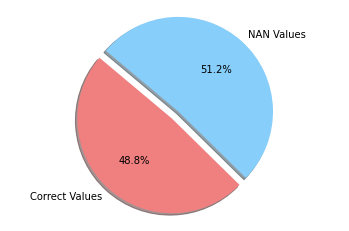

+------------------+------------------+
|                  |   % of NAN Count |
|------------------+------------------|
| air_store_id     |       70.5656    |
| visit_date       |       79.2727    |
| visitors         |       79.2727    |
| visit_datetime   |       20.7698    |
| reserve_datetime |       20.7698    |
| reserve_visitors |       20.7698    |
| air_genre_name   |       71.6778    |
| air_area_name    |       71.6778    |
| latitude         |        0.0425056 |
| longitude        |        0.0425056 |
| hpg_store_id     |       28.3647    |
| hpg_genre_name   |       28.3647    |
| hpg_area_name    |       28.3647    |
| calendar_date    |       99.9575    |
| day_of_week      |       99.9575    |
| holiday_flg      |       99.9575    |
+------------------+------------------+
17-03-2017    799
03-03-2017    791
14-04-2017    791
24-03-2017    789
31-03-2017    786
             ... 
04-01-2016    157
01-01-2017    147
03-01-2016     81
02-01-2016     63
01-01-2016     48
Na

In [11]:
df,fnl_flle = Final_Dataset()

In [12]:
print(df)

                air_store_id  visit_date  visitors       visit_datetime  \
0       air_ba937bf13d40fb24  13-01-2016      25.0  2016-12-22 19:00:00   
1       air_ba937bf13d40fb24  14-01-2016      32.0  2016-12-22 19:00:00   
2       air_ba937bf13d40fb24  15-01-2016      29.0  2016-12-22 19:00:00   
3       air_ba937bf13d40fb24  16-01-2016      22.0  2016-12-22 19:00:00   
4       air_ba937bf13d40fb24  18-01-2016       6.0  2016-12-22 19:00:00   
...                      ...         ...       ...                  ...   
252103  air_24e8414b9b07decb  18-04-2017       6.0  2016-12-22 19:00:00   
252104  air_24e8414b9b07decb  19-04-2017       6.0  2016-12-22 19:00:00   
252105  air_24e8414b9b07decb  20-04-2017       7.0  2016-12-22 19:00:00   
252106  air_24e8414b9b07decb  21-04-2017       8.0  2016-12-22 19:00:00   
252107  air_24e8414b9b07decb  22-04-2017       5.0  2016-12-22 19:00:00   

           reserve_datetime  reserve_visitors air_genre_name  \
0       2016-12-12 21:00:00        

In [13]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['air_store_id'] = lab.fit_transform(df['air_store_id'])
df['hpg_store_id'] = lab.fit_transform(df['hpg_store_id'])
df['air_area_name'] = lab.fit_transform(df['air_area_name'])
df['air_genre_name'] = lab.fit_transform(df['air_genre_name'])
df['hpg_area_name'] = lab.fit_transform(df['hpg_area_name'])
df['hpg_genre_name'] = lab.fit_transform(df['hpg_genre_name'])
df['visit_date'] = lab.fit_transform(df['visit_date'])
df['reserve_datetime'] = lab.fit_transform(df['reserve_datetime'])
df['visit_datetime'] = lab.fit_transform(df['visit_datetime'])
df

,air_store_id,visit_date,visitors,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,hpg_area_name
0,603,192,25.0,0,0,3.0,4,62,35.658068,139.751599,0,0,0
1,603,208,32.0,0,0,3.0,4,62,35.658068,139.751599,0,0,0
2,603,224,29.0,0,0,3.0,4,62,35.658068,139.751599,0,0,0
3,603,240,22.0,0,0,3.0,4,62,35.658068,139.751599,0,0,0
4,603,272,6.0,0,0,3.0,4,62,35.658068,139.751599,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252103,98,279,6.0,0,0,3.0,11,72,35.653217,139.711036,0,0,0
252104,98,295,6.0,0,0,3.0,11,72,35.653217,139.711036,0,0,0
252105,98,311,7.0,0,0,3.0,11,72,35.653217,139.711036,0,0,0
252106,98,327,8.0,0,0,3.0,11,72,35.653217,139.711036,0,0,0


In [18]:
X = df.drop("visitors",axis=1)
y = df['visitors']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [21]:
def Performance_Evaluation():
    clf = RandomForestRegressor(max_depth=10)
    clf.fit(X_train,y_train)
    y_pred_ts = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    print("Predicted values:")
    print(y_pred_ts)
    print ('Test Accuracy:',  clf.score(X_test,y_pred_ts)*100)
    print ('Training Accuracy:',  clf.score(X_train,y_pred_tr)*100) 
    ts_acc = clf.score(X_test,y_pred_ts)*100
    tr_acc = clf.score(X_train,y_pred_tr)*100
    Mean_acc = (((ts_acc+tr_acc)/2))
    return y_pred_ts,clf,y_pred_tr

In [22]:
y_pred_ts,clf,y_pred_tr = Performance_Evaluation()

Predicted values:
[25.9643909  19.49694097 28.96015779 ... 35.7093593   7.54777683
 21.89748836]
Test Accuracy: 100.0
Training Accuracy: 100.0


In [23]:
print("Training before tuning\n")
print ('MAE:', mean_absolute_error(y_train, y_pred_tr))
print ('MSE:', mean_squared_error(y_train, y_pred_tr))
print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_tr)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_train, y_pred_tr))))
print ('R2:', r2_score(y_train, y_pred_tr))
print("Test before tuning\n")
print ('MAE:', mean_absolute_error(y_test, y_pred_ts))
print ('MSE:', mean_squared_error(y_test, y_pred_ts))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ts)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_test, y_pred_ts))))
print ('R2:', r2_score(y_test, y_pred_ts))

Training before tuning

MAE: 10.709653269928792
MSE: 219.7664123329953
RMSE: 14.824520644290502
RMSLE: 2.6962826100804516
R2: 0.21581356951576258
Test before tuning

MAE: 10.874290041417304
MSE: 229.82340942500886
RMSE: 15.159927751312301
RMSLE: 2.718655614458298
R2: 0.18312285039760623


In [24]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [27]:
dt = RandomForestRegressor()

# hyper parameters
""""dt_param = dict(n_estimators = [5,10,15,20,25,30],
                max_features = ['auto', 'sqrt','log2',None],
                criterion = ['friedman_mse', 'absolute_error'],
                max_depth = [100,200,300,400,500,600,700,800,900,1000],
              min_samples_split = [250,370,490,560,640,730,870,980,1250,1890],
                ccp_alpha = [0.000,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045],
                 min_samples_leaf= [1,2,5,10,17,26,37,50,65,82],
                bootstrap = [True, False]
                #min_weight_fraction_leaf = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
               #max_leaf_nodes = [5,10,20,30,40,50,60,70,80,90,100]
               )"""
""""dt_param = dict(n_estimators = [5, 10, 50, 100, 250, 500],
                max_depth = [1, 5, 10, 50, 100])"""
# hyper parameters
dt_param = dict(n_estimators = [5, 10, 50, 100, 250, 500],
                max_depth = [1, 5, 10, 50,100],
                #ccp_alpha = [0.000,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045],
                #bootstrap = [True, False],
                #criterion = ['mse', 'mae'],
                #max_depth = [1, 5, 10, 50,100],
              min_samples_split = [5, 10, 100, 500],
                max_features = ['auto', 'sqrt','log2'],
                 min_samples_leaf= [1,5, 10, 50,100])

In [28]:
from sklearn.model_selection import RandomizedSearchCV
# grid search
rf_random = RandomizedSearchCV(estimator=dt,
                      param_distributions=dt_param,
                      #scoring=rmsle_scorer,
                      n_jobs=-1,
                      cv=5,n_iter=50,
                      verbose=2,
                      return_train_score=True)

In [29]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   5.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   5.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   5.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   5.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   5.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=500, n_estimators=50; total time=   1.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=500, n_estimators=50; total time=   1.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 50, 100],
                                        'min_samples_split': [5, 10, 100, 500],
                                        'n_estimators': [5, 10, 50, 100, 250,
                                                         500]},
                   return_train_score=True, verbose=2)

In [30]:
print(rf_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 50, 'max_features': 'auto', 'max_depth': 100}


In [31]:
y_pred1 = rf_random.predict(X_test)
y_pred2 = rf_random.predict(X_train)
print("Predicted values:")
print(y_pred1)
print ('Test Accuracy:',  rf_random.score(X_test,y_pred1)*100)
print ('Training Accuracy:',  rf_random.score(X_train,y_pred2)*100) 

Predicted values:
[25.52226403 18.36555537 35.69478716 ... 41.60089146  6.98692578
 20.45019487]
Test Accuracy: 100.0
Training Accuracy: 100.0


In [32]:
print("Training after tuning\n")
print ('MAE:', mean_absolute_error(y_train, y_pred2))
print ('MSE:', mean_squared_error(y_train, y_pred2))
print ('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred2)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_train, y_pred2))))
print ('R2:', r2_score(y_train, y_pred2))
print("Test after tuning\n")
print ('MAE:', mean_absolute_error(y_test, y_pred1))
print ('MSE:', mean_squared_error(y_test, y_pred1))
print ('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred1)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(y_test, y_pred1))))
print ('R2:', r2_score(y_test, y_pred1))

Training after tuning

MAE: 8.584094089342775
MSE: 164.89718262553015
RMSE: 12.841229794125255
RMSLE: 2.5526610720340255
R2: 0.41160192921524286
Test after tuning

MAE: 8.743174195961483
MSE: 170.5529990286354
RMSE: 13.05959413720945
RMSLE: 2.569523046582042
R2: 0.3937917462315266
